# Project description
## Objective
The goal of this assignment is to examine a set of bacterial cell images using machine learning techniques, including feature extraction, features selection and clustering, in order to help the biologists organize similar images.
You will load all images, extract features, examine them and select a subset for clustering with the goal of reaching some conclusion about the best way of grouping these images.

## Dataset
Images: bacteria; size: 50x50 pixels, with a black background and the segmented region centered in the image.

# Data preparation

## Import all packages that will be required

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates, scatter_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

from sklearn.neighbors import NearestNeighbors

from sklearn.metrics.cluster import adjusted_rand_score, rand_score
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import pairwise_distances, adjusted_rand_score, silhouette_score

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import pair_confusion_matrix

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np




#from metrics import conf,accuracy,precision,recall,F1

#Add documents below
#from tp2_aux import report_clusters,images_as_matrix

#Only for google collabs
from google.colab import files #this is to load files from your local disk


from sklearn.svm import SVC


# Upload data

Auxiliary document upload

In [ ]:
TP2_aux = files.upload()

Saving tp2_aux.py to tp2_aux.py


Data set

In [ ]:
data = files.upload()

Saving images.zip to images.zip


In [ ]:
import zipfile
import io
images = zipfile.ZipFile(io.BytesIO(data['images.zip']), "r")
images.extractall()

Import labels

In [ ]:
y = files.upload()

Saving labels.txt to labels.txt


# Data preparation

Use the images_as_matrix function to return a 2D numpy array with one image per row (563 rows) and one pixel per column (50x50=2500 columns) from the images in the images folder.

In [ ]:
from tp2_aux import images_as_matrix
X = images_as_matrix(N=563)

# Features Extraction

With each method, extract six features from the data set, for a total of 18 features.

###Principal Component Analysis (PCA)
This is a method of dimensionality reduction that computes new features maximizing the preserved variance of the original data set. It transforms the data into an orthogonal set of coordinates so that the values along each coordinate are not correlated.

In this case, we should not standardize or normalize the data because doing so will distort its shape.


In [ ]:
pca = PCA(n_components = 6) #number of features we want to extract that correspond to the principal components
X_pca = pca.fit_transform(X) #create a new matrix X, X_pca, with the new six features
#intrepretation: prints the first 6 PC for each image

In [ ]:
#Dataframe with the values of the first 6 PCA for all examples
df_pca = pd.DataFrame(X_pca, columns = ['pca1','pca2','pca3','pca4','pca5','pca6'])
print(df_pca)

            pca1        pca2         pca3        pca4        pca5         pca6
0   -1566.769060  256.972338   134.894378    0.425843  -78.218794    42.332711
1   -1096.790534 -259.430893   281.108141  140.740382  486.231415   337.655333
2   -1899.446655  -88.053976   188.661986   18.246848   11.080967  -351.750209
3   -1102.846546 -258.014858  -215.959222 -175.719439 -118.139236   -17.892238
4   -1713.854832 -441.738625   -58.189252  111.578186   86.092232   105.252431
..           ...         ...          ...         ...         ...          ...
558   766.613222 -693.642375  1191.752013   43.697205  195.631095  -181.281841
559 -1446.305757  440.791991   555.953447  349.497894 -388.072203  1224.649261
560 -1607.762033 -339.039533   471.903432  266.077037   42.668347   243.054744
561   200.021657 -567.829965   950.199775  125.970219 -700.379754  -788.112330
562  -320.936427  914.236166   623.763306  320.710145  536.388401  -289.591051

[563 rows x 6 columns]


###t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
tsne = TSNE(n_components = 6, method = 'exact') #method = ’barnes_hut’ is the default. method = 'exact' runs a slower, but exact, algorithm in O(N^2) time. The exact algorithm should be used when nearest-neighbor errors need to be better than 3%. However, the exact method cannot scale to millions of examples.
X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
#Dataframe
df_tsne = pd.DataFrame(X_tsne,columns = ['tsne1','tsne2','tsne3','tsne4','tsne5','tsne6'])
print(df_tsne)


         tsne1      tsne2      tsne3      tsne4      tsne5       tsne6
0   -16.146107 -46.526985  22.714661  61.349079  61.336628  149.271530
1     4.998256   1.461501  18.353733  -9.762613  -7.073804    0.597496
2    -6.257734 -11.230388   7.680480   8.978596 -12.154492   17.980730
3    -7.618859  -3.839668   6.554085  -1.947300  -2.720489   -6.673718
4    -7.377851 -14.815546  10.062776  -3.609728  -7.566521    1.437502
..         ...        ...        ...        ...        ...         ...
558   5.716385  10.248283  -8.424593  13.881694  16.067451    4.636803
559  -2.713100   3.017999  10.714832 -18.690546  -6.406290    5.869809
560 -15.690948 -11.339141  15.514273  -2.471037 -16.423775   -0.099537
561  17.935659   3.909082  -1.303315   5.674487  -6.739152  -15.024755
562 -10.842173  15.079699   1.467208  -1.528749 -12.860255   -0.257833

[563 rows x 6 columns]


###Isometric mapping with Isomap

In [ ]:
isomap = Isomap(n_components = 6, n_neighbors=5) #5 é o numero de neighbours por default
X_isomap = isomap.fit_transform(X)

In [ ]:
#Dataframe
df_isomap = pd.DataFrame(X_isomap,columns = ['im1','im2','im3','im4','im5','im6'])
print(df_isomap)

             im1          im2  ...         im5          im6
0   -3542.154360   985.098659  ...   15.216278  1308.514337
1   -3150.522163  -585.940269  ...  655.008573   813.251967
2   -4943.865828    85.856124  ... -407.711430  1107.826303
3   -2305.977768  -639.373716  ... -606.680737    76.015657
4   -3927.758208  -839.460439  ...  613.825335   994.550631
..           ...          ...  ...         ...          ...
558  2725.343066   720.793744  ...  961.556475  -839.706573
559 -4475.871424  1152.987403  ...  371.217944   588.210993
560 -4567.669782    36.818054  ...  423.216752  1478.428098
561  3365.305026  -210.677432  ... -544.573532  -313.341049
562  -896.830004  3109.392351  ...  782.954261   634.254161

[563 rows x 6 columns]


### Dataframe with 18 features and labels

'\n# Label encoding for categoricals\nfor colname in df_evaluated.select_dtypes("object"):\n    df_evaluated[colname], _ = df_evaluated[colname].factorize()\n\n# Discrete features\ndiscrete_features = df_evaluated.dtypes == int\n'

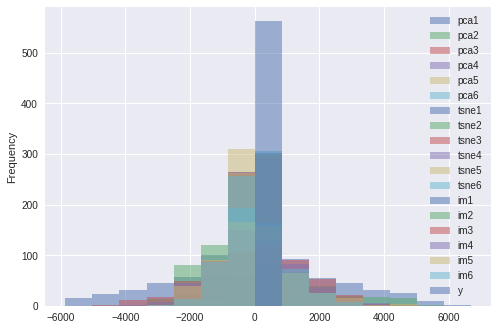

In [ ]:
#Transform the labels document into a pandas dataframe
labels = np.loadtxt('labels.txt', delimiter=',')
y = labels[:,1].reshape(-1,1)
y = pd.DataFrame(y, columns = ['y'])

#Create a dataframe with the 18 features and the y values
df_total = pd.concat((df_pca, df_tsne, df_isomap, y), axis=1)
#print(df_total)
#Select only the rows when y != 0
df_evaluated = df_total[df_total['y'] > 0]
df_evaluated.pop("y")

y_evaluated = y[y['y'] > 0]


"""
# Label encoding for categoricals
for colname in df_evaluated.select_dtypes("object"):
    df_evaluated[colname], _ = df_evaluated[colname].factorize()

# Discrete features
discrete_features = df_evaluated.dtypes == int
"""

# Feature selection

### Analysis of Variance (ANOVA) F-test


In [ ]:
#Evaluate the most usefull features with ANOVA
f, prob = f_classif(df_evaluated,y_evaluated)

f_scores = pd.Series(f, name="F Scores", index=df_evaluated.columns)
print(f_scores.sort_values(ascending=False))

prob = pd.Series(prob, name="prob", index=df_evaluated.columns)
print(prob.sort_values(ascending=True))

pca2     46.633881
im2      42.177493
im1      21.995044
pca3     19.187784
tsne1    10.515045
pca1      7.842584
tsne6     7.741913
tsne2     5.710917
tsne5     3.767043
im3       2.724466
im4       2.360416
pca6      1.262720
tsne3     1.075578
im5       0.783035
im6       0.753187
tsne4     0.750089
pca4      0.339141
pca5      0.281641
Name: F Scores, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### SelectKbest method (uses ANOVA as well)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pca2     46.633881
im2      42.177493
im1      21.995044
pca3     19.187784
tsne1    10.515045
pca1      7.842584
tsne6     7.741913
tsne2     5.710917
tsne5     3.767043
im3       2.724466
im4       2.360416
pca6      1.262720
tsne3     1.075578
im5       0.783035
im6       0.753187
tsne4     0.750089
pca4      0.339141
pca5      0.281641
Name: Selector Scores, dtype: float64


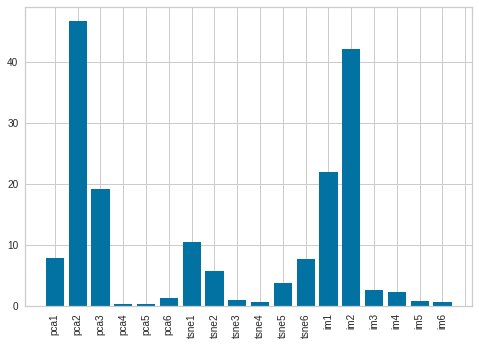

In [ ]:
#Evaluate the most usefull features with Select K Best - Lecture 15
selector = SelectKBest(f_classif, k=7)
X_final = selector.fit_transform(df_evaluated, y_evaluated)

selector_scores = pd.Series(selector.scores_, name="Selector Scores", index=df_evaluated.columns)
print(selector_scores.sort_values(ascending=False))

plt.xticks(range(0, 19))
plt.xticks(rotation=90)
plt.bar(selector_scores.index, selector_scores.values)
plt.show()


In [ ]:
cols = selector.get_support(indices=True)
features_df_new = df_evaluated.iloc[:,cols]

Scatter matrix of 7 features with highest ANOVA F score


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe381e56e10>,
      dtype=object)

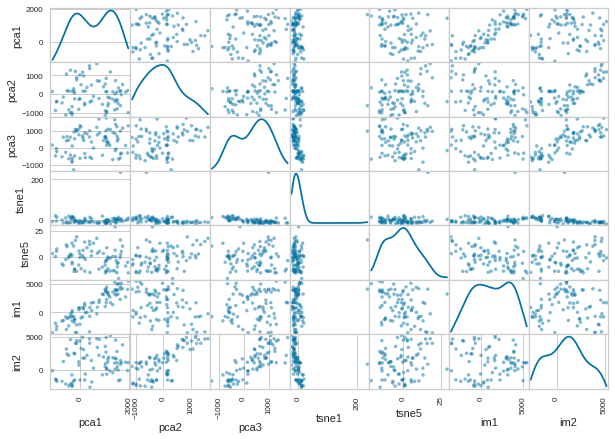

In [ ]:
plot = scatter_matrix(features_df_new, alpha=0.5, figsize=(10,7), diagonal='kde')
plot

Distribution of pre-selected 7 features

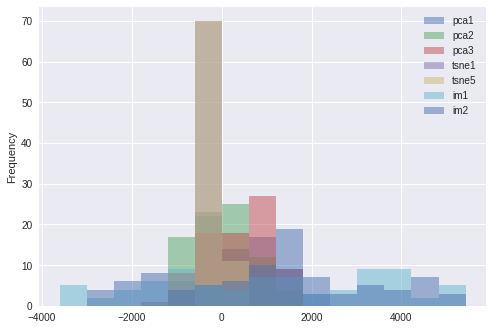

In [ ]:
plt.style.use('seaborn')
features_df_new.plot(kind='hist', bins=15, alpha=0.5)

### Feature correlation matrix

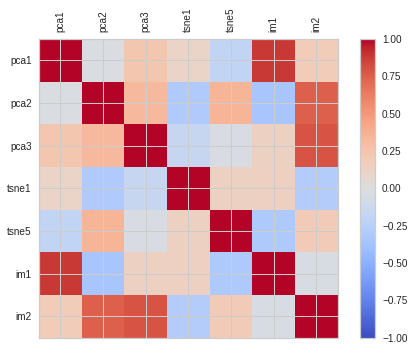

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = features_df_new
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

#Here we can see that pca1 and im1 is very correlated, so we should choose one of them. Pca1 had a lower score in Kbest and also lower F value, so im1 is a better feature.

### Mutual information criteria

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [ ]:
MI = mutual_info_classif(features_df_new, y_evaluated)
mi_scores = pd.Series(MI, name="MI Scores", index=features_df_new.columns)
print(mi_scores.sort_values(ascending=False))
#Estimated mutual information between each feature and the target.
#we can see that some of the features have a modestly low score, such as pca1, suggesting that perhaps they can be removed.
# We can choose 3 features: PCA2 (col1), IM1 (col12), IM2 (col13). Or 2 features would be: PCA2 (col1), IM2 (col13).

tsne1    0.421671
pca2     0.410035
im1      0.341470
im2      0.331820
pca3     0.177537
pca1     0.095247
tsne5    0.017212
Name: MI Scores, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Manual feature selection explanation



*   First, from 18 extracted features, we have decided to choose features with highest variance between classes (highest F-score in ANOVA F test). This resulted in the selection of initial 7 features (pca1, pca2, pca3, im1, im2, tsne1, tsne3)

*   Next, by looking at feature correlation matrix, we have noticed that pca1 and im1 features are highly correlated. Since im1 had a higher F score, we decided to remove pca1 from our selected features.

*   Next, when looking at mutual information criteria, we have observed that some features have a low score MI score (pca1, pca3, tsne1, tsne3), hence such features exhibit a very low relationship with our class labels.


*  For our clustering algorithms we have decided to use either 3 feature (pca2, im1 and im2) or 2 feature (pca2 and im2) data.



In [ ]:
# 2 features

features_2 = df_total.iloc[:,[1,13,18]]
Y_features_2 = features_2.iloc[:,-1]
X_features_2 = features_2.iloc[:, features_2.columns != 'y']

#Normalize the data by z-score
means2 = X_features_2.mean(axis=0)
std2=X_features_2.std(axis=0)
x_norm_z2 = (X_features_2 - means2)/(std2)
#print(x_norm_z)

alldata_scaled2 = pd.concat((x_norm_z2, Y_features_2), axis=1)
alldata_not_scaled2=pd.concat((X_features_2, Y_features_2), axis=1)
#print(alldata_scaled)
#print(alldata_not_scaled)

X2 = alldata_scaled2[['pca2','im2']].values
y_values2 = alldata_scaled2[['y']].values.flatten()

# 3 features

features_3 = df_total.iloc[:,[1,12,13,18]]
Y_features_3 = features_3.iloc[:,-1]
X_features_3 = features_3.iloc[:, features_3.columns != 'y']

#Normalize the data by z-score
means3 = X_features_3.mean(axis=0)
std3=X_features_3.std(axis=0)
x_norm_z3 = (X_features_3 - means3)/(std3)
#print(x_norm_z)

alldata_scaled3 = pd.concat((x_norm_z3, Y_features_3), axis=1)
alldata_not_scaled3=pd.concat((X_features_3, Y_features_3), axis=1)
#print(alldata_scaled)
#print(alldata_not_scaled)

X3 = alldata_scaled3[['pca2', 'im1','im2']].values
y_values3 = alldata_scaled3[['y']].values.flatten()

Distribution of data before scaling

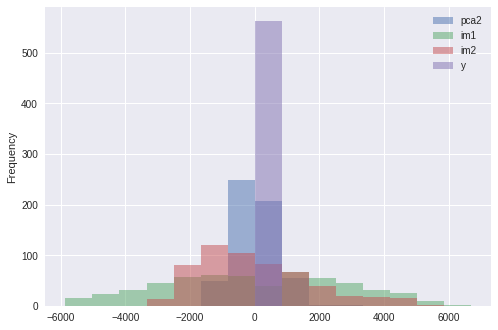

In [ ]:
plt.style.use('seaborn')
alldata_not_scaled3.plot(kind='hist', bins=15, alpha=0.5)

Distribution of data after scaling

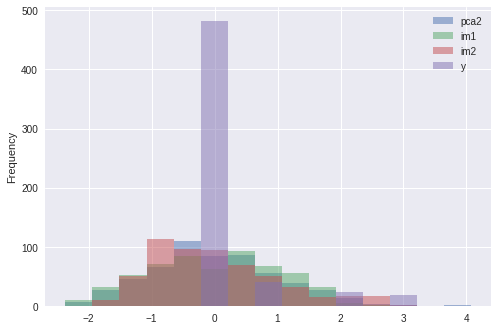

In [ ]:
plt.style.use('seaborn')
alldata_scaled3.plot(kind='hist', bins=15, alpha=0.5)

#Clustering algorithms
For this assignment, you will parametrize and compare at least two clustering algorithms: DBSCAN and K-Means.

## Functions to print all evaluation metrics

In [ ]:
def metrics(X, cluster_labels, true_y, pred_y):
  silhouette_avg = silhouette_score(X, cluster_labels)
  adj_rand_score = adjusted_rand_score(true_y, pred_y)
  RI = rand_score(true_y, pred_y)
  confusion = pair_confusion_matrix(true_y, pred_y)
  TP = confusion[1,1]
  FP = confusion[0,1]
  FN = confusion[1,0]
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  F1 = 2*(precision*recall)/(precision+recall)
  """
  Predict number of clusters using Silhoutte method. The silhouette score of 1 means that the clusters are very dense and nicely separated.
  The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.
  This gives a perspective into the density and separation of the formed clusters.
  """

  return("The avg silhouette_score:", np.round(silhouette_avg,3), "R score:", np.round(RI,3),
         "Adjusted R score:", np.round(adj_rand_score,3), "Precision:",np.round(precision,3),
         "Recall:", np.round(recall,3), "F1:", np.round(F1,3))


# DBSCAN
(you should use a value of 5 neighbouring points as this is the default value in the Scikit-Learn implementation of DBSCAN)

For 2 features

In [ ]:
clustering = DBSCAN(eps=0.4).fit(X2)
#clustering.labels_

[[0.         0.03928347 0.0562729  0.10797705 0.15083685 0.15400721]
 [0.         0.03022901 0.03622872 0.07303455 0.09074338 0.094304  ]
 [0.         0.05002199 0.09333645 0.10754338 0.12457125 0.13401075]
 ...
 [0.         0.08459277 0.09938084 0.12190377 0.12243365 0.13430459]
 [0.         0.05866535 0.08119497 0.10263005 0.11830083 0.13374063]
 [0.         0.05023176 0.08655165 0.11836009 0.17392846 0.17457321]]


Text(0.5, 1.0, 'DBSCAN')

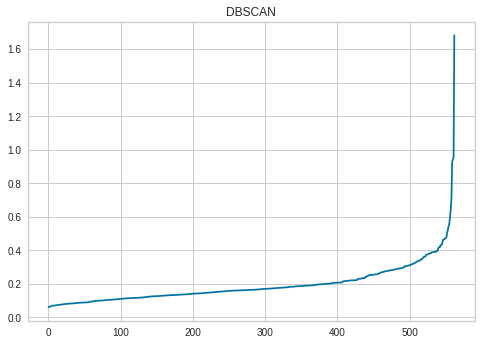

In [ ]:
#FIND THE BEST EPSILON
#Calculate the distances of each point to its 5 (default) nearest neighbours
nn5 = NearestNeighbors(n_neighbors = 6) #we need to exclude the point itself!!!!
nn5_X = nn5.fit(X2)
distances, indices = nn5_X.kneighbors(X2)
print(distances) #prints distances o a point to each of its 5 nearest neighbours

#Plot this distances
distances = np.sort(distances, axis=0) #sort in ascending order
distances = distances[:,-1] #we want the distance to the fifth neighbor#
plt.plot(distances)
plt.title("DBSCAN")

Text(0.5, 1.0, 'DBSCAN 2 Features')

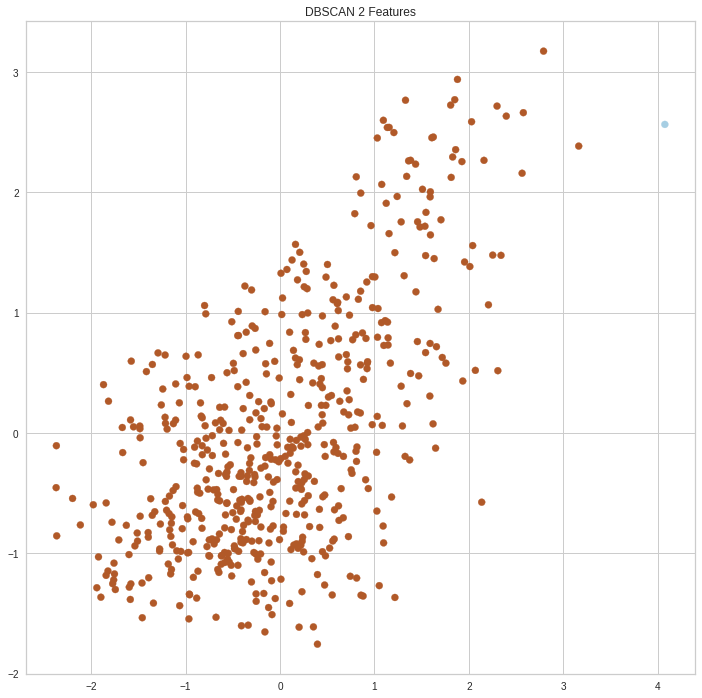

In [ ]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(X2[:,0], X2[:,1],c=clustering.labels_, cmap='Paired')
plt.title("DBSCAN 2 Features")

In [ ]:
#EVALUATE PERFORMANCE
clustering = DBSCAN(eps=0.4).fit(X2)
cluster_labels = clustering.labels_
#print(clustering.labels_)
true_y2 =((y_values2[y_values2!=0]).astype(int)-1)
pred2 = (cluster_labels[y_values2!=0])
print(metrics(X2,cluster_labels,true_y2,pred2))

('The avg silhouette_score:', 0.507, 'R score:', 0.38, 'Adjusted R score:', 0.012, 'Precision:', 0.37, 'Recall:', 0.986, 'F1:', 0.538)


For 3 Features for now


In [ ]:
clustering = DBSCAN(eps=0.8).fit(X3)
#clustering.labels_

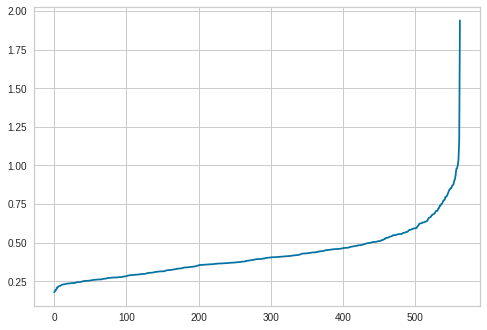

In [ ]:
#FIND THE BEST EPSILON
#Calculate the distances of each point to its 5 (default) nearest neighbours
nn5 = NearestNeighbors(n_neighbors = 6) #we need to exclude the point itself!!!!
nn5_X = nn5.fit(X3)
distances, indices = nn5_X.kneighbors(X3)
#print(distances) #prints distances o a point to each of its 5 nearest neighbours

#Plot this distances
distances = np.sort(distances, axis=0) #sort in ascending order
distances = distances[:,-1] #we want the distance to the fifth neighbor#
plt.plot(distances)

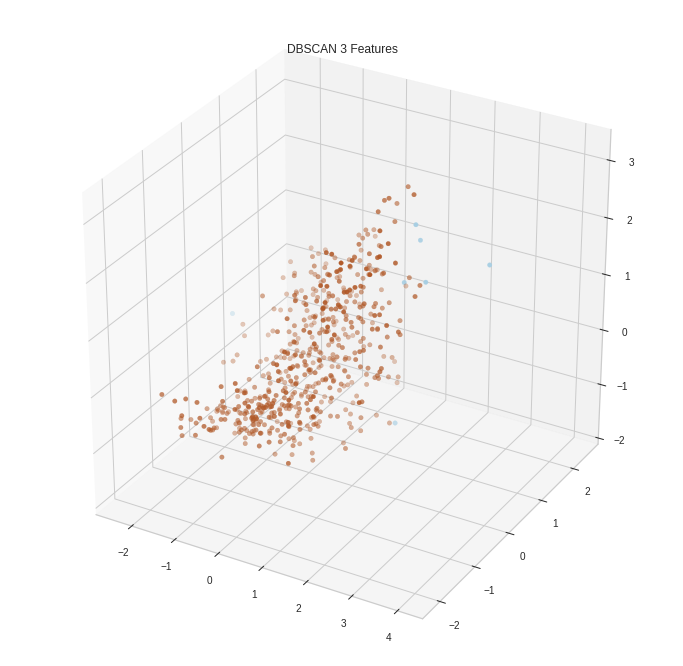

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=clustering.labels_, cmap='Paired')
plt.title("DBSCAN 3 Features")
plt.show()

In [ ]:
#EVALUATE PERFORMANCE
clustering = DBSCAN(eps=0.8).fit(X3)
cluster_labels = clustering.labels_
#print(clustering.labels_)
true_y3 =((y_values3[y_values3!=0]).astype(int))
pred3 = (cluster_labels[y_values3!=0])

print(metrics(X3,cluster_labels,true_y3,pred3))

('The avg silhouette_score:', 0.397, 'R score:', 0.377, 'Adjusted R score:', 0.007, 'Precision:', 0.368, 'Recall:', 0.981, 'F1:', 0.536)


For DBSCAN - We chose 3 feat. We now vary the value of epsilon from 250 to 2000 (see nearest neigbor plot).
If we scale data we should use epsilon that is 0.5 to 1.0

In [ ]:
#EVALUATE PERFORMANCE
eps_vals = np.arange(0.25, 1.00, 0.025)

for eps in eps_vals:
    clustering = DBSCAN(eps=eps).fit(X3)
    cluster_labels = clustering.labels_

    true_y3 =((y_values3[y_values3!=0]).astype(int))
    pred3 = (cluster_labels[y_values3!=0])

    print("For epsilon =", str(np.round(eps,3)), metrics(X3,cluster_labels,true_y3,pred3))



For epsilon = 0.25 ('The avg silhouette_score:', -0.327, 'R score:', 0.439, 'Adjusted R score:', -0.061, 'Precision:', 0.34, 'Recall:', 0.563, 'F1:', 0.424)
For epsilon = 0.275 ('The avg silhouette_score:', -0.265, 'R score:', 0.462, 'Adjusted R score:', -0.065, 'Precision:', 0.334, 'Recall:', 0.474, 'F1:', 0.392)
For epsilon = 0.3 ('The avg silhouette_score:', -0.319, 'R score:', 0.531, 'Adjusted R score:', -0.002, 'Precision:', 0.365, 'Recall:', 0.38, 'F1:', 0.372)
For epsilon = 0.325 ('The avg silhouette_score:', -0.297, 'R score:', 0.627, 'Adjusted R score:', 0.185, 'Precision:', 0.49, 'Recall:', 0.458, 'F1:', 0.473)
For epsilon = 0.35 ('The avg silhouette_score:', -0.207, 'R score:', 0.663, 'Adjusted R score:', 0.242, 'Precision:', 0.549, 'Recall:', 0.443, 'F1:', 0.49)
For epsilon = 0.375 ('The avg silhouette_score:', -0.097, 'R score:', 0.708, 'Adjusted R score:', 0.386, 'Precision:', 0.59, 'Recall:', 0.662, 'F1:', 0.624)
For epsilon = 0.4 ('The avg silhouette_score:', -0.045, 'R

# K-Means

# K-means with 2 features

Predict number of clusters using Elbow method.
In this plot, the number of clusters k is plotted against the distortion score, which is a total of within-cluster sum of squares for a given number of k. The optimal number of k is determined by a point where there is a bend in the curve (elbow). In this case, it is not very clear where we are seeing the bend, the best k = 3. However we could try a  range of k=2 to K=10 to check model performance.

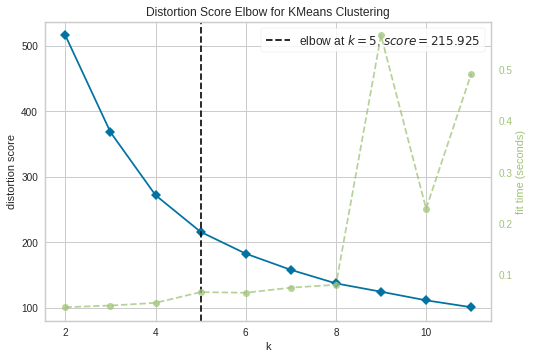

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X2)
visualizer.show()

### Plot K-means clustering and add different performance metrics (based on 2 best features)

Here we need to report: Silhouette score, the Rand index, Precision, Recall, the F1 measure and the adjusted Rand index.
 Note that the adjusted Rand index can be computed using the adjusted_rand_score function and the silhouette score using silhouette_score, both from sklearn.metrics.

For KMeans clusters n = 2 ('The avg silhouette_score:', 0.482, 'R score:', 0.68, 'Adjusted R score:', 0.362, 'Precision:', 0.546, 'Recall:', 0.75, 'F1:', 0.632)
For KMeans clusters n = 3 ('The avg silhouette_score:', 0.352, 'R score:', 0.693, 'Adjusted R score:', 0.322, 'Precision:', 0.59, 'Recall:', 0.525, 'F1:', 0.556)
For KMeans clusters n = 4 ('The avg silhouette_score:', 0.354, 'R score:', 0.676, 'Adjusted R score:', 0.249, 'Precision:', 0.585, 'Recall:', 0.393, 'F1:', 0.47)
For KMeans clusters n = 5 ('The avg silhouette_score:', 0.368, 'R score:', 0.664, 'Adjusted R score:', 0.203, 'Precision:', 0.572, 'Recall:', 0.324, 'F1:', 0.414)
For KMeans clusters n = 6 ('The avg silhouette_score:', 0.359, 'R score:', 0.658, 'Adjusted R score:', 0.181, 'Precision:', 0.564, 'Recall:', 0.293, 'F1:', 0.386)
For KMeans clusters n = 7 ('The avg silhouette_score:', 0.357, 'R score:', 0.643, 'Adjusted R score:', 0.138, 'Precision:', 0.525, 'Recall:', 0.257, 'F1:', 0.345)
For KMeans clusters n = 8 

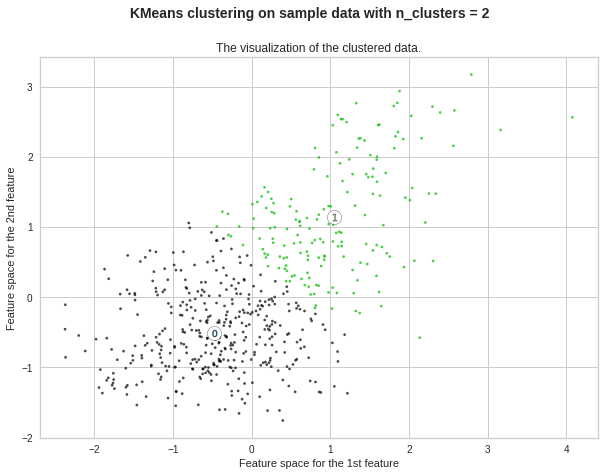

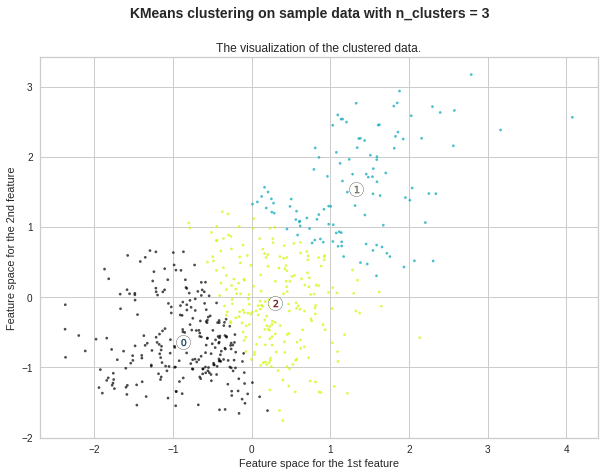

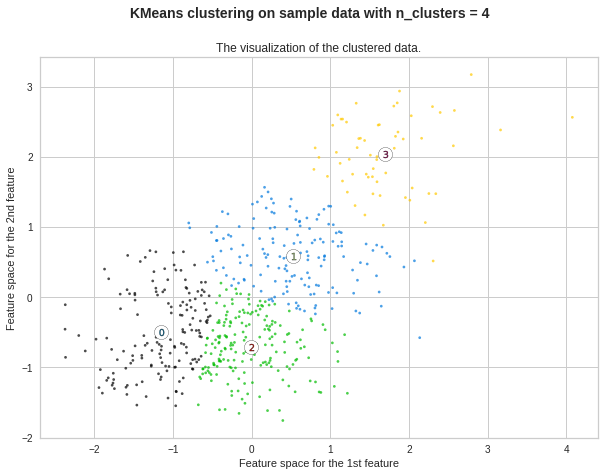

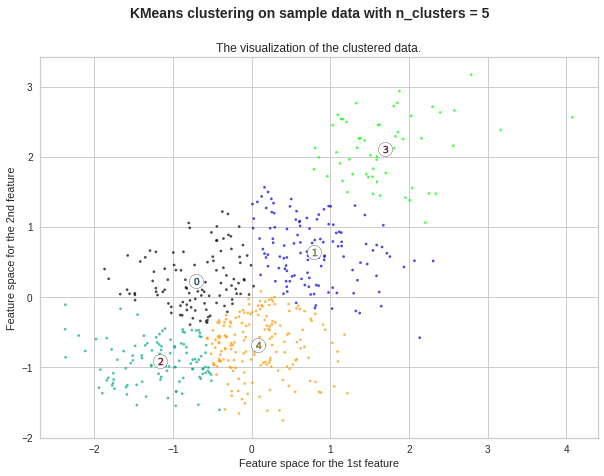

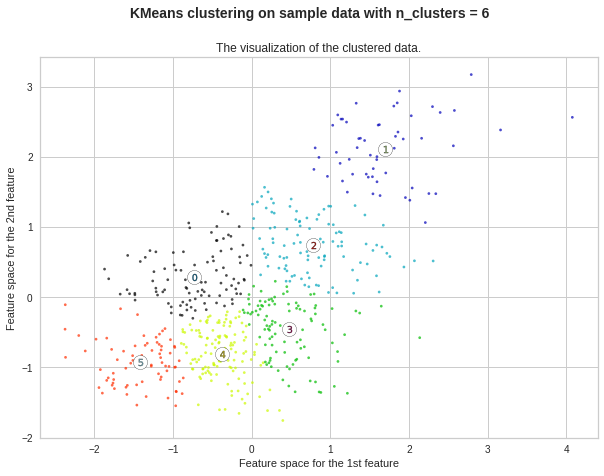

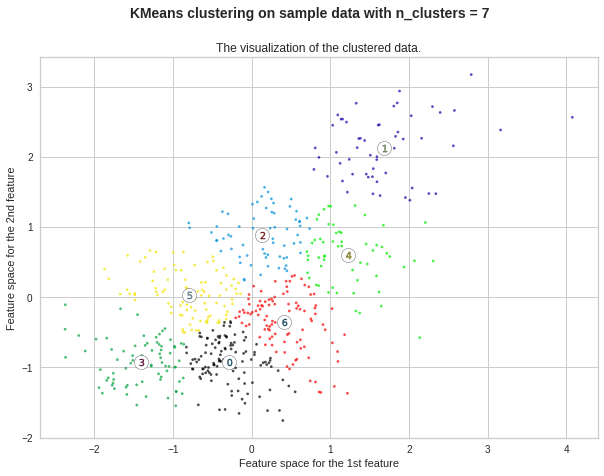

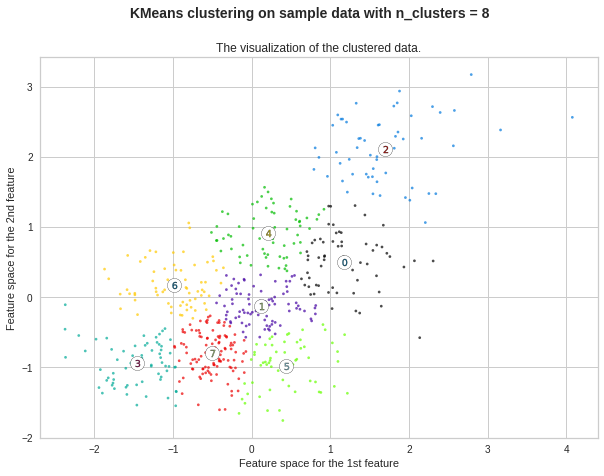

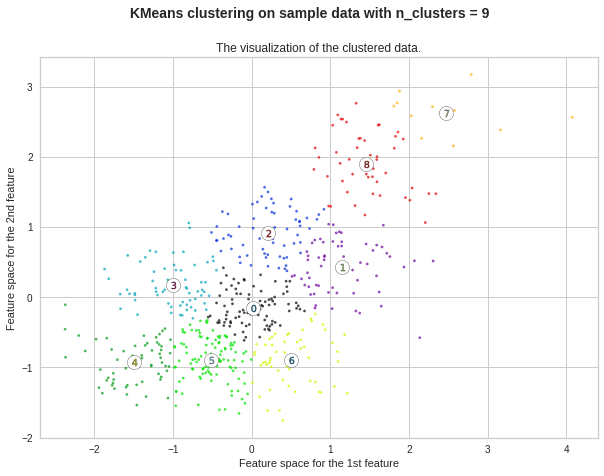

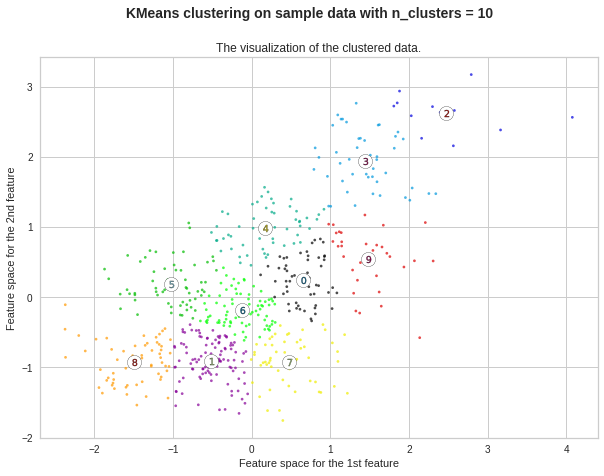

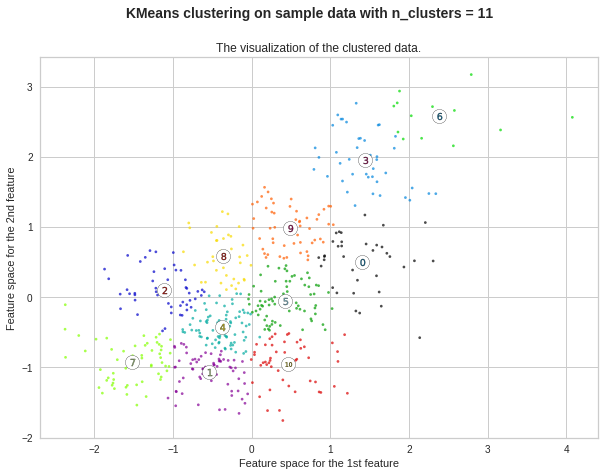

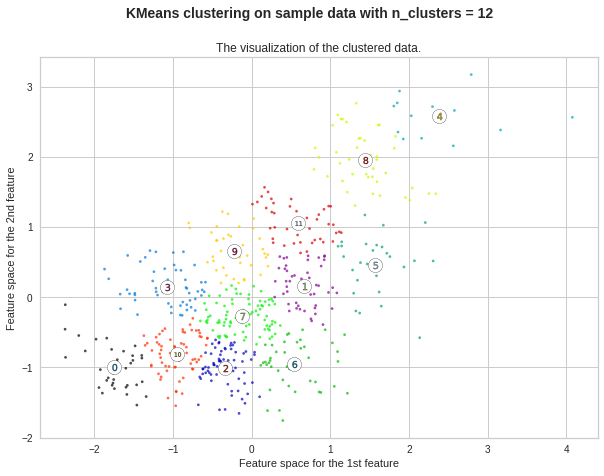

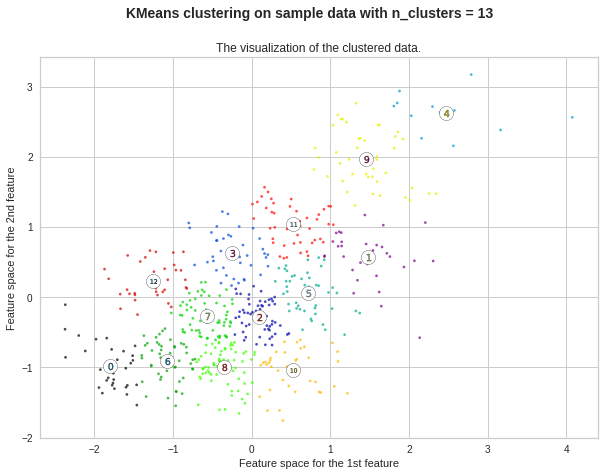

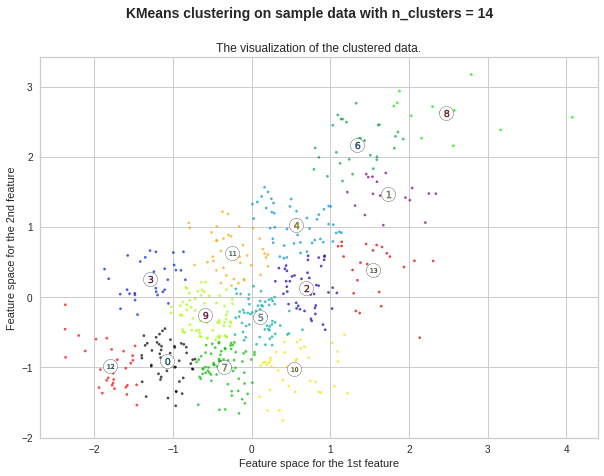

In [ ]:
from tp2_aux import report_clusters

range_n_clusters = np.arange(2,15)

ids = (alldata_scaled2.index.values +1)


for n_clusters in range_n_clusters:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7)
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,  random_state=10, init = 'k-means++')
    cluster_labels2 = clusterer.fit_predict(X2)
    true_y2 =((y_values2[y_values2!=0]).astype(int) -1)
    pred2 = (cluster_labels2[y_values2!=0])
    print("For KMeans clusters n =", str(n_clusters), metrics(X2,cluster_labels2,true_y2,pred2))
    report_clusters(ids, cluster_labels2, report_file='KMeans clustering (2 features) with K =' + str(n_clusters) + '.html')
    # Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels2.astype(float) / n_clusters)
    ax.scatter(
        X2[:, 0], X2[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



# K-means with 3 features

Elbow method estimates best k=4?

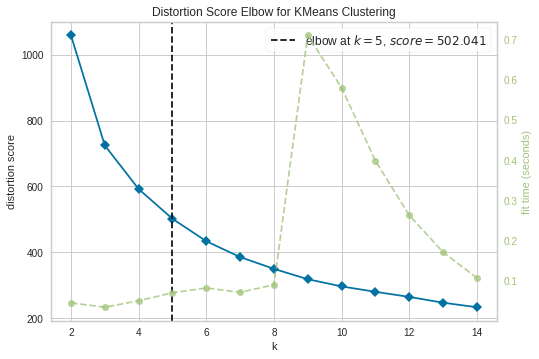

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(X3)
visualizer.show()

### Plot K-means clustering and add different performance metrics (based on  3 best features)

For KMeans clusters n = 2 ('The avg silhouette_score:', 0.359, 'R score:', 0.731, 'Adjusted R score:', 0.473, 'Precision:', 0.591, 'Recall:', 0.863, 'F1:', 0.702)
For KMeans clusters n = 3 ('The avg silhouette_score:', 0.342, 'R score:', 0.675, 'Adjusted R score:', 0.293, 'Precision:', 0.56, 'Recall:', 0.531, 'F1:', 0.545)
For KMeans clusters n = 4 ('The avg silhouette_score:', 0.307, 'R score:', 0.675, 'Adjusted R score:', 0.283, 'Precision:', 0.563, 'Recall:', 0.502, 'F1:', 0.531)
For KMeans clusters n = 5 ('The avg silhouette_score:', 0.307, 'R score:', 0.68, 'Adjusted R score:', 0.269, 'Precision:', 0.587, 'Recall:', 0.428, 'F1:', 0.495)
For KMeans clusters n = 6 ('The avg silhouette_score:', 0.298, 'R score:', 0.682, 'Adjusted R score:', 0.256, 'Precision:', 0.606, 'Recall:', 0.378, 'F1:', 0.465)
For KMeans clusters n = 7 ('The avg silhouette_score:', 0.293, 'R score:', 0.68, 'Adjusted R score:', 0.222, 'Precision:', 0.636, 'Recall:', 0.294, 'F1:', 0.402)
For KMeans clusters n = 8

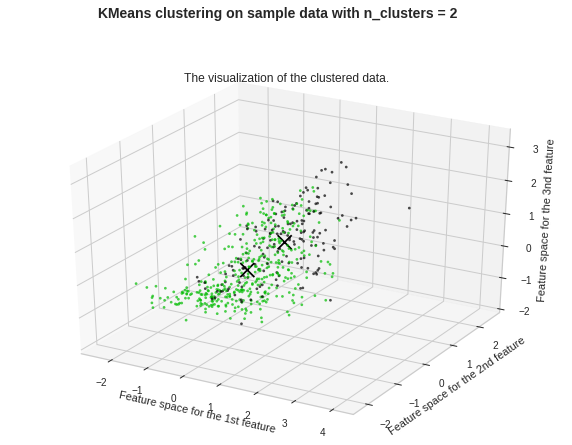

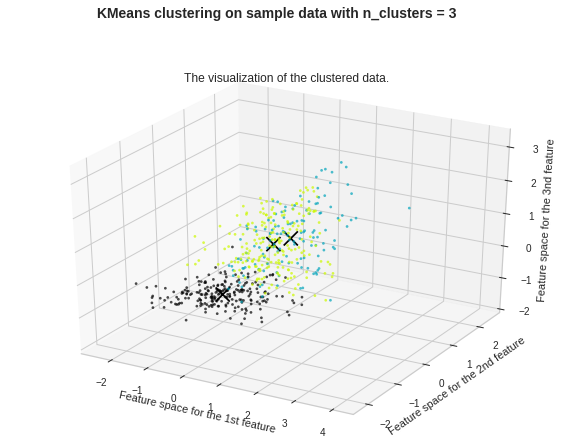

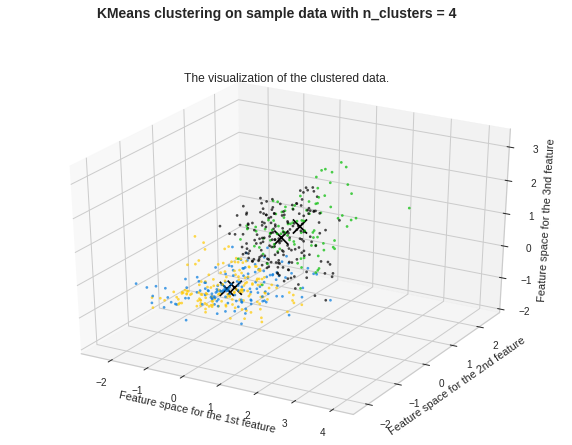

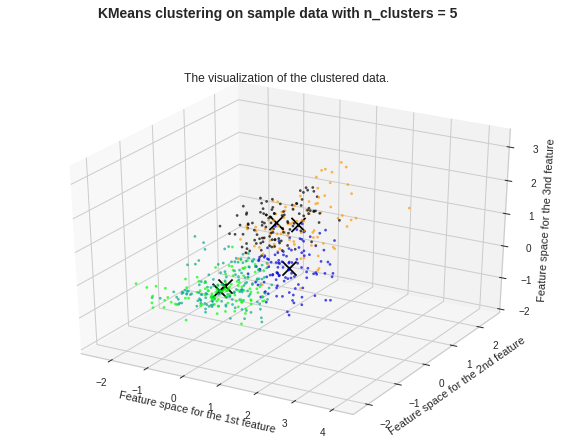

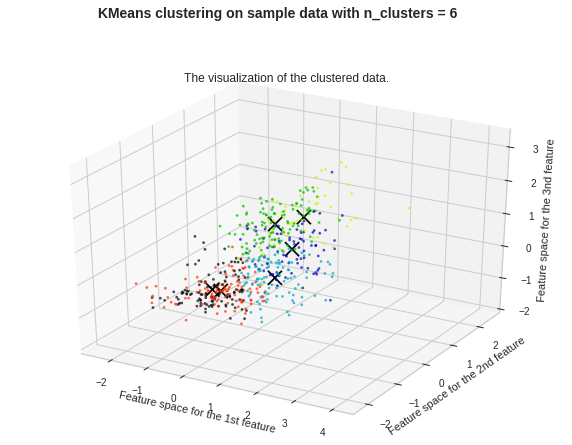

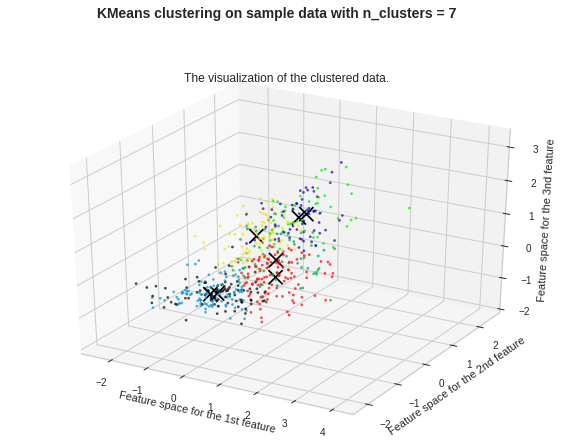

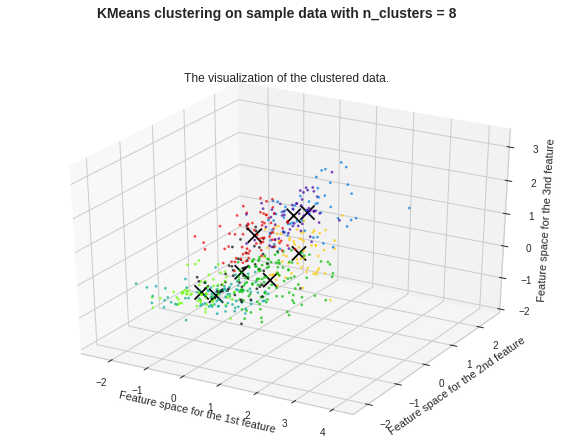

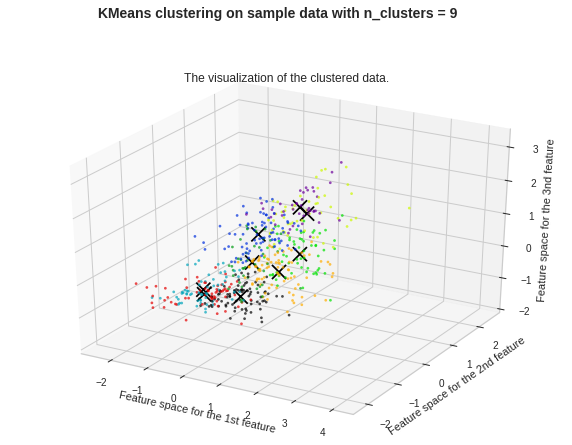

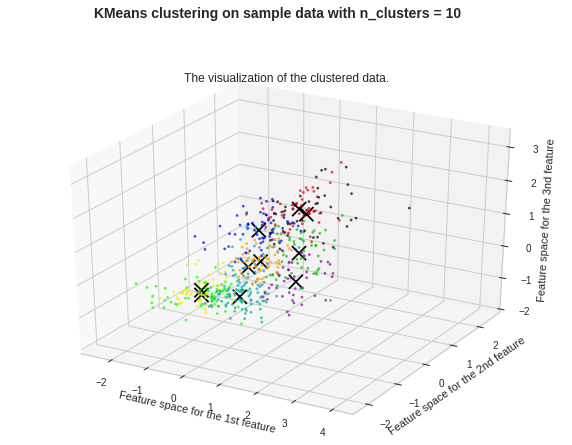

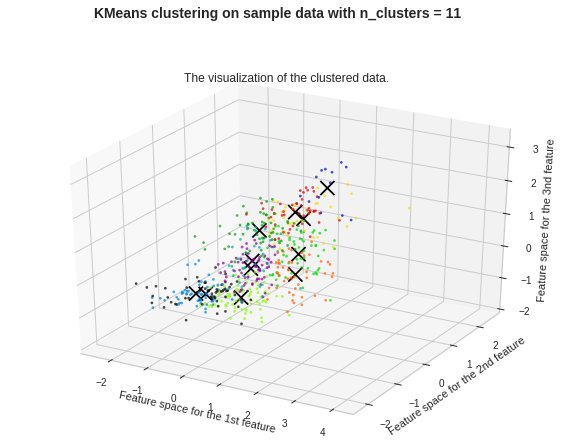

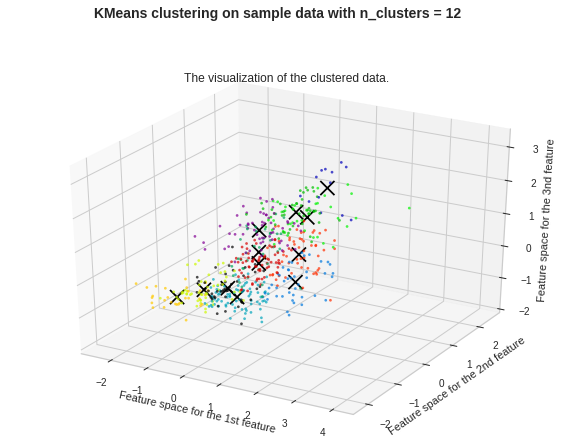

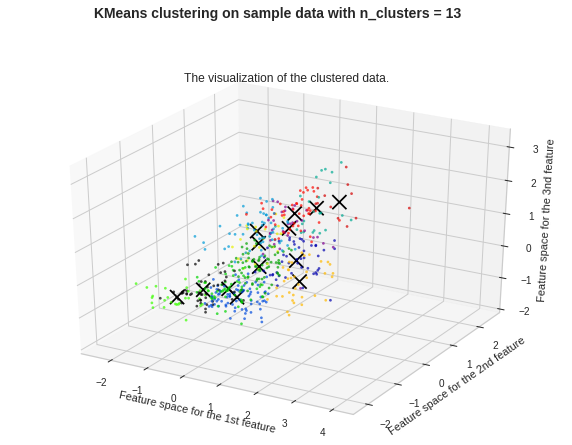

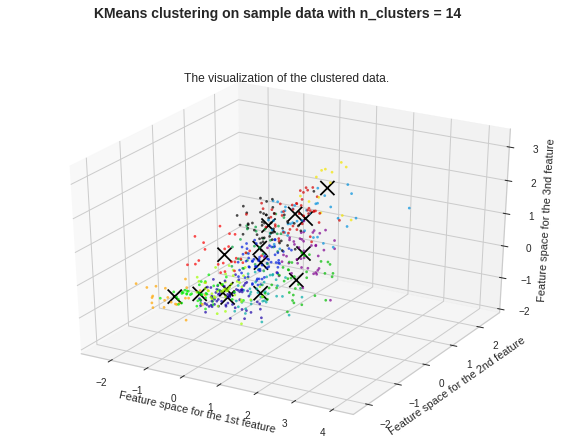

In [ ]:
from tp2_aux import report_clusters
from mpl_toolkits.mplot3d import Axes3D

range_n_clusters = np.arange(2,15)

ids = (alldata_scaled3.index.values +1)


for n_clusters in range_n_clusters:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #fig2, ax2 = plt.subplots()
    fig.set_size_inches(10, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,  random_state=10, init = 'k-means++')
    cluster_labels3 = clusterer.fit_predict(X3)

    true_y3 =((y_values3[y_values3!=0]).astype(int) -1)
    pred3 = (cluster_labels3[y_values3!=0])

    print("For KMeans clusters n =", str(n_clusters), metrics(X3,cluster_labels3,true_y3,pred3))

    report3 = report_clusters(ids, cluster_labels3, report_file='KMeans clustering (3 features) with K =' + str(n_clusters) + '.html')


    # Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels3.astype(float) / n_clusters)

    ax.scatter(
        X3[:, 0], X3[:, 1], X3[:,2], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax.scatter(
        centers[:, 0],
        centers[:, 1],
        centers[:, 2],
        marker= "x",
        c="black",
        linewidths=1,
        alpha=1,
        s=200, label = 'centroid'
    )


    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")
    ax.set_zlabel("Feature space for the 3nd feature")

    plt.suptitle(
        "KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



### With k-means we selected dataset with 3 features and k=11 clusters for further visual examination.

In [ ]:
from tp2_aux import report_clusters
ids = (alldata_scaled2.index.values +1)

clusterer = KMeans(n_clusters=11, random_state=10, init = 'k-means++')
cluster_labels_X3_k11 = clusterer.fit_predict(X3)
true_y3 =((y_values2[y_values3!=0]).astype(int) -1)
pred3 = (cluster_labels_X3_k11[y_values3!=0])
print("For KMeans clusters n =", str(11), metrics(X3,cluster_labels_X3_k11,true_y3,pred3))

report_clusters(ids, cluster_labels_X3_k11,  report_file='KMeans clustering based on 3 features matrix with 11 clusters.html') #KMeans with feature 3 matrix


For KMeans clusters n = 11 ('The avg silhouette_score:', 0.283, 'R score:', 0.679, 'Adjusted R score:', 0.186, 'Precision:', 0.717, 'Recall:', 0.205, 'F1:', 0.319)


# Gausian mixture model

First, we could predict number of components using a built-in analytical criterion in Gaussian mixture model, such as Bayesian Information Criteria (BIC). For clustering using Gaussian mixture model we have chosen a matrix with 3 features, because it gave us better clustering performance results using both, DBSCAN and KMeans clustering.

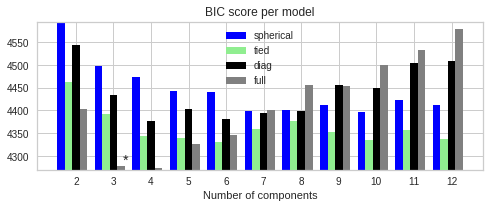

In [ ]:

import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture


lowest_bic = np.infty
bic = []
n_components_range = range(2, 13)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X3)
        bic.append(gmm.bic(X3))

bic = np.array(bic)
color_iter = itertools.cycle(["blue", "lightgreen", "black", "grey"])
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)
plt.show()

Choosing best number of components and covariance type for Gaussian mixture model.

In [ ]:
from tp2_aux import report_clusters
from sklearn.mixture import GaussianMixture


ids = (alldata_scaled2.index.values +1)

n_components_range = range(2, 13)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        clustererGM = GaussianMixture(n_components=n_components, covariance_type=cv_type, random_state=10).fit(X3)
        cluster_labelsGM = clustererGM.predict(X3)
        true_y3 =((y_values3[y_values3!=0]).astype(int) -1)
        pred3 = (cluster_labelsGM[y_values3!=0])
        print("For covariance type=", cv_type, "and number of components=", str(n_components), metrics(X3,cluster_labelsGM,true_y3,pred3))
        report_clusters(ids, cluster_labelsGM, report_file='Gaussian clustering (2 features) with cov_type =' + str(cv_type) + 'number_comp =' + str(n_components)+ '.html')


For covariance type= spherical and number of components= 2 ('The avg silhouette_score:', 0.384, 'R score:', 0.689, 'Adjusted R score:', 0.406, 'Precision:', 0.547, 'Recall:', 0.879, 'F1:', 0.674)
For covariance type= spherical and number of components= 3 ('The avg silhouette_score:', 0.341, 'R score:', 0.673, 'Adjusted R score:', 0.288, 'Precision:', 0.555, 'Recall:', 0.532, 'F1:', 0.543)
For covariance type= spherical and number of components= 4 ('The avg silhouette_score:', 0.298, 'R score:', 0.684, 'Adjusted R score:', 0.305, 'Precision:', 0.574, 'Recall:', 0.524, 'F1:', 0.548)
For covariance type= spherical and number of components= 5 ('The avg silhouette_score:', 0.296, 'R score:', 0.673, 'Adjusted R score:', 0.257, 'Precision:', 0.569, 'Recall:', 0.434, 'F1:', 0.493)
For covariance type= spherical and number of components= 6 ('The avg silhouette_score:', 0.284, 'R score:', 0.671, 'Adjusted R score:', 0.213, 'Precision:', 0.596, 'Recall:', 0.315, 'F1:', 0.413)
For covariance type=

Looking at different cov types, cov type = "spherical" and n=11 components performed best when looking at clustering metrics (For n = 11 | For cov_type = spherical | The avg silhouette_score: 0.271 | R score: 0.689 | Adjusted R score: 0.22 | Precision: 0.722 | Recall: 0.243 | F1: 0.363).

In [ ]:
from tp2_aux import report_clusters
ids = (alldata_scaled2.index.values +1)

clustererGM11 = GaussianMixture(n_components=11, covariance_type="spherical", random_state=10).fit(X3)
cluster_labelsGM11 = clustererGM11.predict(X3)
true_y3 =((y_values3[y_values3!=0]).astype(int) -1)
pred3 = (cluster_labelsGM11[y_values3!=0])
print("For covariance type = spherical and number of components=", str(11), metrics(X3,cluster_labelsGM11,true_y3,pred3))


report_clusters(ids, cluster_labelsGM11,  report_file='Gaussian mixture model clustering (tied covariance) based on 3 features matrix with 11 clusters.html')


For covariance type = spherical and number of components= 11 ('The avg silhouette_score:', 0.271, 'R score:', 0.689, 'Adjusted R score:', 0.22, 'Precision:', 0.722, 'Recall:', 0.243, 'F1:', 0.363)


# Optional exercise (2/20) - Bissecting K-Means hierarchical clustering (lecture 19)
Top-down: divisive (bisecting k-means)
Example of hierarchical divisive clustering. The possibility of stopping at any desired level makes this process less time-consuming, although it is a divisive cluster (usually O(2^n)).

Implement the bissecting K-Means hierarchical clustering algorithm, as described in lecture 19. This can be done using the KMeans classifier available in the Scikit-Learn library to split each cluster into two sub-clusters with k = 2. Repeat this process by splitting the cluster with the largest number of examples in each iteration for a predetermined number of iterations. The output should be a list of lists, with each list corresponding to one example and listing all cluster labels to which the example was assigned, in order. Here is an example of using bissecting K-Means for three iterations on five examples. The first example was placed on cluster of index 1 in the first iteration, with the remainder on cluster of index 0. Then the third example was placed on sub-cluster of index 1, the other three on the sub-cluster of index 0. Of these, the second and fourth examples were placed in sub-sub-cluster 0 ([0, 0, 0]) and the fifth example on sub-sub-cluster of index 1 ([0, 0, 1]):

 https://medium.com/@afrizalfir/bisecting-kmeans-clustering-5bc17603b8a2
*   1) Set K to define the number of cluster
*   2) Set all data as a single cluster
*   3) Use K-means with K=2 to split the cluster
*   4) Measure the distance for each intra cluster (sum of squares distance)
*   5) Select the cluster that have the largest distance and split to 2 cluster using K-means.
*   6) Repeat step 3–5 until the number of leaf cluster = K.












In [ ]:
k = 2
from sklearn.cluster import KMeans
import numpy as np
X_2_test = np.array([[1, 1], [1, 1], [1, 0], [1, 2], [10, 4], [5, 0]])
X_2_test
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_2_test)

#kmeans.labels_
#kmeans.predict([[0, 0], [12, 3]])
#kmeans.cluster_centers_



In [ ]:
X_2_test

array([[ 1,  1],
       [ 1,  1],
       [ 1,  0],
       [ 1,  2],
       [10,  4],
       [ 5,  0]])

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 0, 1], dtype=int32)

In [ ]:
list1 = kmeans.labels_


array([1, 1, 1, 1, 0, 1], dtype=int32)

Cluster that is 0 will have smallest intracluster distance and put it into a list (position 0), cluster with label 1 will have larger distance. We append label of cluster 1 into list position 1 to N. And split points belonging to cluster 1 further?

In [ ]:
np.shape(kmeans.labels_)

(6,)

In [ ]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [ ]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)